In [17]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
list(data_dir.glob('*')) #폴더

[PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses')]

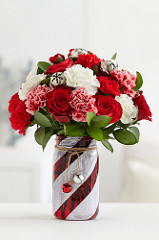

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [25]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [49]:
folder = '/root/.keras/datasets/flower_photos/' + 'tulips/'
folder = pathlib.Path(folder)
folder

PosixPath('/root/.keras/datasets/flower_photos/tulips')

In [38]:
folder = '/root/.keras/datasets/flower_photos/tulips/'

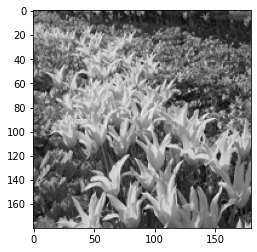

In [48]:
import matplotlib.pyplot as plt
img = PIL.Image.open(str(file_list[0]))
img = img.resize((180, 180))
img = img.convert('L')
imgarr = np.array(img)
imgre = imgarr / 255
plt.imshow(imgre, cmap='gray')

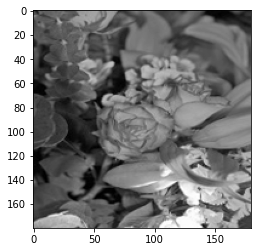

In [53]:
file_list = list(folder.glob('*'))

X=[]; y=[]; catNum = 0

folder_list = ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']

for item in folder_list:
  folder = '/root/.keras/datasets/flower_photos/'+ item + '/'
  folder = pathlib.Path(folder)
  file_list = list(folder.glob('*'))
  for file in file_list:
    img = PIL.Image.open(str(file))
    img = img.resize((180, 180))
    img = img.convert('L')
    imgarr = np.array(img)
    imgre = imgarr / 255
    plt.imshow(imgre, cmap='gray')
    X.append(imgre)
    y.append(catNum)
  catNum += 1

In [54]:
len(X)

3670

In [55]:
len(y)

3670

In [58]:
np.savez('flower.npz', x=X,y=y)

In [59]:
!ls

flower.npz  gdrive  sample_data


In [60]:
data = np.load('flower.npz')

In [63]:
x = data['x']
y = data['y']

In [66]:
class_name =  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']

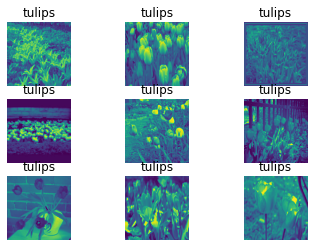

In [68]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(class_name[y[i]])
  plt.axis("off")

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [70]:
len(np.unique(y_train))

5

In [78]:
np.shape(x_train)

(2936, 180, 180)

In [88]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(180,180)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  #tf.keras.layers.Dropout(0.2), # 가중치 20퍼 제거
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs= 94)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/94
92/92 [==============================] - 9s 93ms/step - loss: 4.0357 - accuracy: 0.2510
Epoch 2/94
92/92 [==============================] - 9s 93ms/step - loss: 1.7737 - accuracy: 0.2837
Epoch 3/94
92/92 [==============================] - 9s 93ms/step - loss: 1.7624 - accuracy: 0.3038
Epoch 4/94
92/92 [==============================] - 9s 93ms/step - loss: 1.7020 - accuracy: 0.2830
Epoch 5/94
74/92 [=======================>......] - ETA: 1s - loss: 1.5497 - accuracy: 0.3171